# COGS  - Final Project

https://docs.google.com/document/d/1IMQ9_9TBsWFXKovrPqFjuonHIWj6UqlheJpqwwFu0hw/edit?usp=sharing

# Names

- Shenova Davis
- Lauren Lui
- Vincent Sgherzi

# Introduction

Houses are one of the most expensive purchases families make in their lifetime. With housing prices spiraling out of control it is often difficult to determine the true value of a particular house. Our project aims to use ocean proximity, number of bedrooms, and house age as factors used in a machine learning model to predict the value of a house. The findings from our study can have practical implications for real estate purposes and prospective homeowners seeking insight into the various factors that influence housing prices. 

# Question

Can we predict the prices of houses given specific features, such as a its proximity to an ocean, the average number of bedrooms, and housing age?


# Hypothesis

Houses located in close proximity to the ocean, with the largest number of bedrooms, and newer in age will be more expensive in price. 

# Setup

In [1]:
# import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#for logistic regression and for kfold
from statsmodels.formula.api import logit

from sklearn.preprocessing import StandardScaler

# import any needed libraries here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Data

The dataset used is pulled from Kaggle at https://www.kaggle.com/datasets/shibumohapatra/house-price, which collects data on California housing prices. Described below are the features in our dataset:
- Longitude: Longitude value for the block in California, USA
- Latitude: Latitude value for the block in California, USA
- Housing_median_age: Median age of the house in the block
- Total_rooms: Count of the total number of rooms (excluding bedrooms) in all houses in the block
- Total_bedrooms: Count of the total number of bedrooms in all houses in the block
- Population: Count of the total number of population in the block
- Households: Count of the total number of households in the block
- Median_income: Median of the total household income of all the houses in the block
- Ocean_proximity: Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' ]
- Median_house_value: Median of the household prices of all the houses in the block



In addition, more information on our dataset as for relevance is as follows:
- Number of observations: 20,600 observations
- Relevant predictors: 7 predictors
    - population
    - ocean proximity (longitude, latitude)
    - median house value
    - number of households
    - total rooms
    - house median age
    
By analyzing the data set above, we will be able to train a model to accurately predict the prices of houses given certain features of a house, such as its proximity to an ocean, average number of bedrooms, and housing age. 

To clean the data, first we need to drop all variables that are not needed as well as dropping the observations with missing data. 

In [2]:
# read data
df = pd.read_csv('house.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
# clean data by renaming columns, dropping columns, and removing missing values
df = df.rename(columns={'housing_median_age': 'median_age', 
                        'median_house_value': 'median_price'})
# df = df.drop(columns = ['total_bedrooms'])
df = df.dropna(axis='index')

In [5]:
# adjust output of ocean_proximty column
df['ocean_proximity'].unique()

# get one hot encoding 
one_hot = pd.get_dummies(df['ocean_proximity'])
# drop current ocean_proximity as it is now encoded
df = df.drop('ocean_proximity',axis = 1)
# join the encoded df
df = df.join(one_hot)

# rename columns
df = df.rename(columns={'<1H OCEAN': '<1h_ocean', 
                        'INLAND': 'inland', 'ISLAND': 
                        'island', 'NEAR BAY': 'near_bay', 
                        'NEAR OCEAN': 'near_ocean'})

df

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_price,<1h_ocean,inland,island,near_bay,near_ocean
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


# Exploratory Data Analysis (EDA)

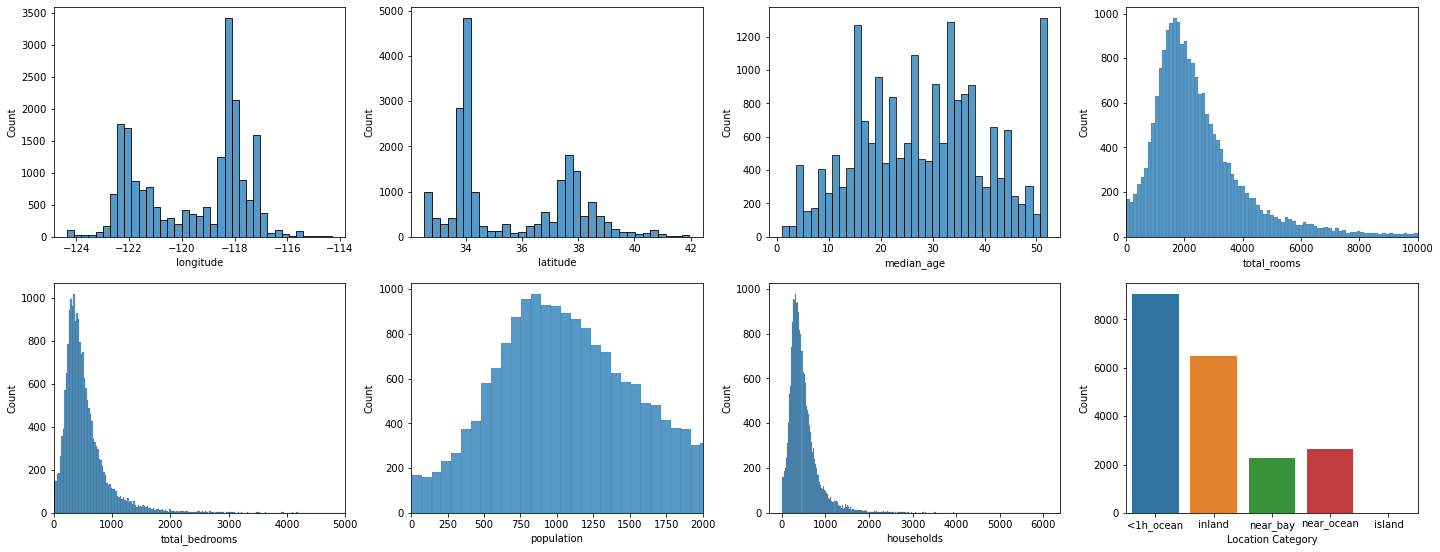

The mean longitude is 0   -118.31
dtype: float64
The mean latitude is 0    34.06
dtype: float64
The mean age is 28.633093525179856
The mean room is 2636.5042333480155


In [6]:
plt.rcParams['figure.figsize'] = (20, 15)

features = [col for col in df.columns]

plotArr = [None] * 9

location_columns = ["<1h_ocean", "inland", "near_bay", "near_ocean", "island"]
location_counts = df[location_columns].sum()

for i in range(1, 9):
    
    if(i == 8):
        plotArr[i] = plt.subplot(4, 4, i)
        plt.tight_layout()
        sns.barplot(x=location_counts.index, y=location_counts.values)
        plt.xlabel('Location Category')
        plt.ylabel('Count')
    else:
        plotArr[i] = plt.subplot(4, 4, i)
        plt.tight_layout()
        sns.histplot(data=df, x=features[i - 1], ax=plotArr[i])
        


plotArr[4].set_xlim([0, 10000]) 
plotArr[5].set_xlim([0, 5000]) 
plotArr[6].set_xlim([0, 2000]) 
plt.show()

mean_longitude = df['longitude'].mode()
mean_latitude = df['latitude'].mode()
mean_age = df['median_age'].mean()
mean_room = df['total_rooms'].mean()

print(f"The mean longitude is {mean_longitude}")
print(f"The mean latitude is {mean_latitude}")
print(f"The mean age is {mean_age}")
print(f"The mean room is {mean_room}")


Longitude Lattitude
In the graphs for longitude and lattitude the largest spikes are under long,lat (-118.31,34.06). These coordinates present themselves as the center of Los Angeles. Consulting wikipekia for California city populations (https://en.wikipedia.org/wiki/List_of_largest_cities_in_California_by_population) Los Angeles reveals itself to be the most populated with 3.8 million residents whereas the next most populated presents itself as San Diego with a mere 1.3 million residents, about 34% of LA's population. The large residnet pool in this location is what likely contributes to the spikes in these locations.

Age
In the graph for median age data seems mostly random. The largest spikes present themselves at 34 and 51 years of age with sparatic spikes at 27 and 16.According to data from (http://www.betterinstitutions.com/blog/2021/3/25/what-housing-boom-an-updated-chart-of-housing-units-built-each-year-in-the-city-of-los-angeles), majority of Los Angeles housing was built around and before 1939 with the seccond most in the period 1950-1959. Given that dataset has an estimated age of 1950, subtracting 1950 from 1939 leads to roughly 50 -which is reflefcted in the age graph. 

Total number of rooms


Population

Households

median income

Ocean proxmimity


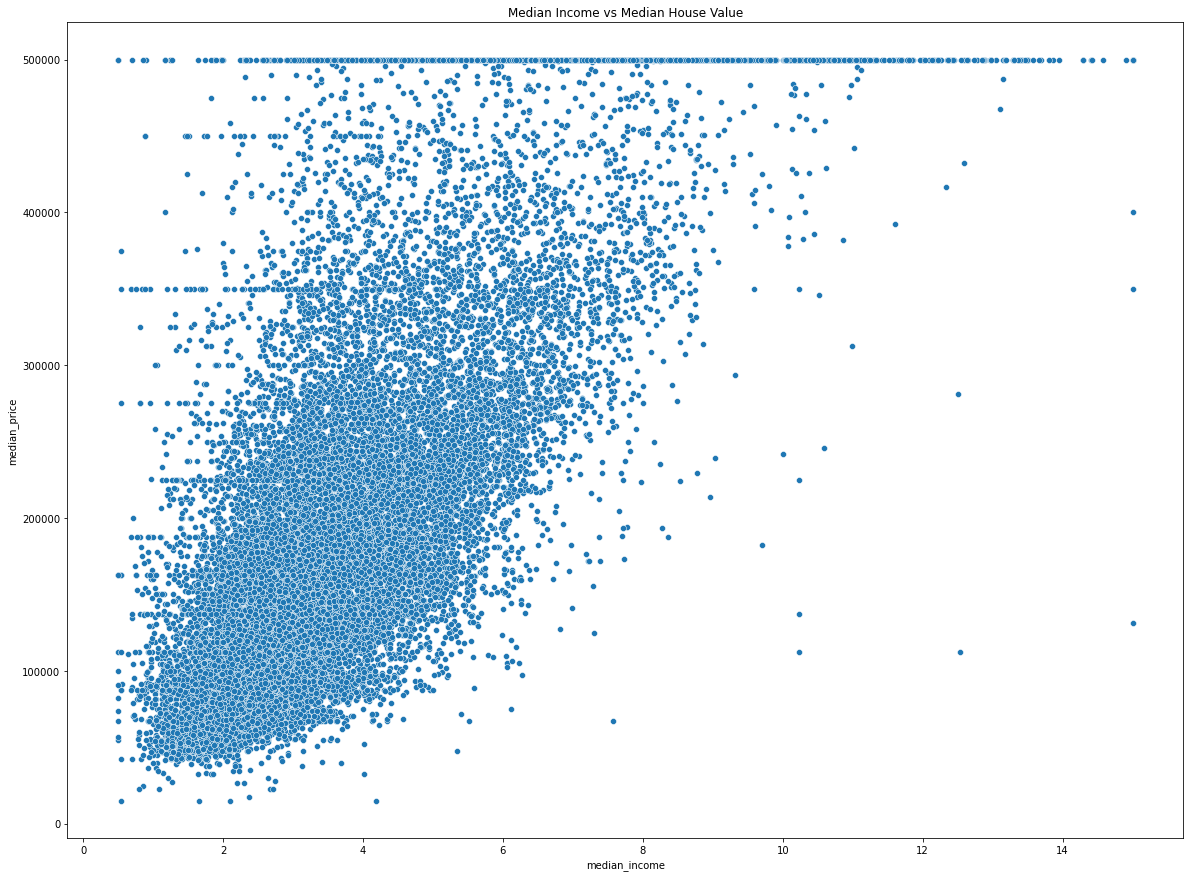

In [7]:
sns.scatterplot(x='median_income', y='median_price', data=df)
plt.title('Median Income vs Median House Value') 
plt.show() 

# Model Selection & Implementation

In [8]:
X = df.drop('median_price',axis=1)
y = df['median_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

standardizer = StandardScaler()

#Standardizing the values
X_train = standardizer.fit_transform(X_train)
X_test = standardizer.fit_transform(X_test)
# [LinReg, randomForest, knn, decision trees]
# setup arrays to store metrics to compare algorithms
MODEL_NUM = 4
rmse, mse, r2 = np.zeros(MODEL_NUM), np.zeros(MODEL_NUM), np.zeros(MODEL_NUM)

In [9]:
# LOOCV

loo = LeaveOneOut()
mse_scores = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculate the mean of the MSE scores
mean_mse = np.mean(mse_scores)

print("Mean MSE:", mean_mse)

NameError: name 'LeaveOneOut' is not defined

In [ ]:
# linear regression
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_pred = linReg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print('RMSE:', rmse)
print('MSE:', mse)
print('R^2:', r2)

In [ ]:
# knn
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print('RMSE:', rmse)
print('MSE:', mse)
print('R^2:', r2)

In [ ]:
# # bootstrap
# boots = 100
# #initialize an empty array of length 100 to store our estimated coefficient result
# fitParamArr = np.zeros(boots)

# for i in range(boots):
#     #sample with replacement
#     thisBoot = df.sample(frac=1, replace=True)
    
#     #fit model
#     mdl = logit(formula = 'median_price ~ ocean_proximity + total_bedrooms + median_age + 1', data=thisBoot).fit(disp = False)
    
#     #put the estimated param back to the array, to eventually create a distribution 
#     fitParamArr[i] = mdl.params[2]
    

# print(np.mean(fitParamArr))
# print(np.std(fitParamArr))

import statsmodels.api as sm

# bootstrap
boots = 100
# initialize an empty array of length 100 to store our estimated coefficient result
fitParamArr = np.zeros(boots)

for i in range(boots):
    # sample with replacement
    thisBoot = df.sample(frac=1, replace=True)
    
    # fit model
    X = thisBoot[['ocean_proximity', 'total_bedrooms', 'median_age']]
    y = thisBoot['median_price']
    X = sm.add_constant(X)  # Add a constant term
    mdl = sm.Logit(y, X).fit(disp=False)
    
    # put the estimated param back to the array, to eventually create a distribution
    fitParamArr[i] = mdl.params['ocean_proximity']
    
print(np.mean(fitParamArr))
print(np.std(fitParamArr))
